In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline

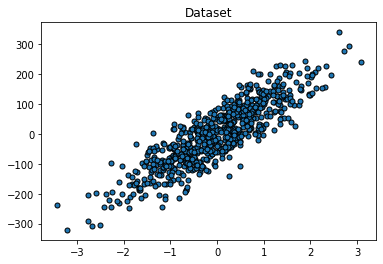

In [2]:
plt.figure(figsize=(6, 4))
plt.title("Dataset")
X, y = make_regression(n_samples=700, n_features=1, noise=50)
plt.scatter(X[:, 0], y, marker='o', s=25, edgecolor='k')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression + Gradiente Descent from Scratch

Mean Square Error:

$J(\theta) = \frac{1}{m}\Sigma_{i=1}^{m}(h_\theta(x^i)-y^i)^2$

Partial Derivative:

$\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\Sigma_{i=1}^{m}(\theta^Tx^i-y^i)x_j^i$

90.91040184327476 * x + 0.8667351227115162


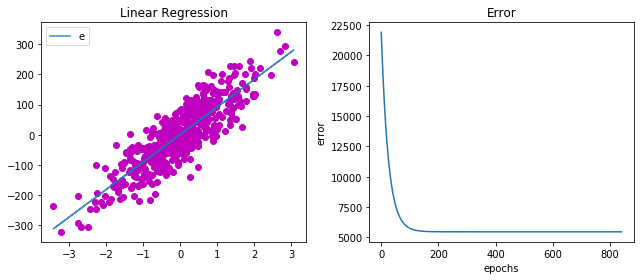

In [12]:
def linear_regression_mult_gd(X, y, epoch=60000, lr=1e-2):
    """Multivariate Linear Regression with Gradient Descent : Multidimensional."""
    total_expected_error = 0
    # Initialize the weights with random values
    W = np.random.rand(X.shape[1]) * np.sqrt(2/(X.shape[1] + 1))
    # We are just copying to presentation
    W_org = W.copy()
    errorlist = []
    epoch_steps = 0
    # Run for the epochs
    for k in range(epoch):
        # prediction
        Z = np.dot(X, W)
        # calculate the error
        error = (Z - y)
        # MSE
        total_error = (2 / X.shape[0]) * np.sum(error**2)
        # Calculate the gradient / partial derivative
        # gradient = np.dot(X.T, error) # shortcut gives overflow in MSE
        gradient = (2 / X.shape[0]) * np.dot(X.T, error)
        # adjust the weights using the learning rate and the gradient
        W -= lr * gradient
        # In case we need to stop iterating because the error is too low
        if np.abs(total_expected_error-total_error) < 1e-15:
            return W_org, W, total_error, errorlist, epoch_steps
        total_expected_error = total_error
        # Support vars
        errorlist.append(total_error)
        epoch_steps += 1
    return W_org, W, total_error, errorlist, epoch_steps

A = np.c_[X_train, np.ones(len(X_train))]
W_org, W, error, errorlist, epoch_steps = linear_regression_mult_gd(A.copy(), y_train.copy())
print(f"{W[0]} * x + {W[1]}")
e = W[1] + (X_train * W[0])

plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('Linear Regression')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e, alpha=.85, label='e')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Error')
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(range(epoch_steps), errorlist)
plt.tight_layout()
plt.show()

#### Linear Regression using Scikit-Learn

90.91040585585468 * x + 0.866736483718572


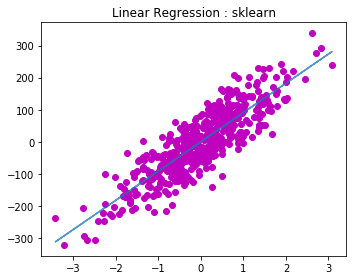

In [13]:
A = np.c_[X_train, np.ones(len(X_train))]
reg = LinearRegression().fit(A, y_train)
e_sk_value = (reg.coef_ * A) + reg.intercept_

print(f"{reg.coef_[0]} * x + {reg.intercept_}")
plt.figure(figsize=(5, 4))
plt.title('Linear Regression : sklearn')
plt.plot(X_train, y_train, 'mo')
plt.plot(X_train, e_sk_value[:, 0], alpha=.75)
plt.tight_layout()
plt.show()